**Pressione SHIFT+ENTER para executar a célula**

# Alegrete

### Setup

In [1]:
%matplotlib inline

import random

from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import alegrete

### Data visualization

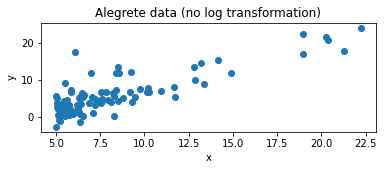

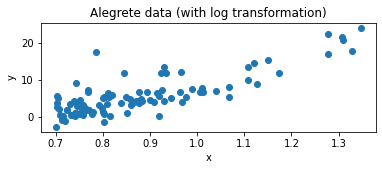

In [2]:
alegrete_data = np.genfromtxt("alegrete.csv", delimiter=",")

plt.figure(figsize=(6, 2))
plt.scatter(alegrete_data[:, 0], alegrete_data[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Alegrete data (no log transformation)')
plt.show()

# Applies log to the input variable, since the distribution seems to be log related.
alegrete_data[:, 0] = np.log10(alegrete_data[:, 0])

plt.figure(figsize=(6, 2))
plt.scatter(alegrete_data[:, 0], alegrete_data[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Alegrete data (with log transformation)')
plt.show()

### Linear regression execution and MSE computation over iterations

Final MSE: 9.98492235283749


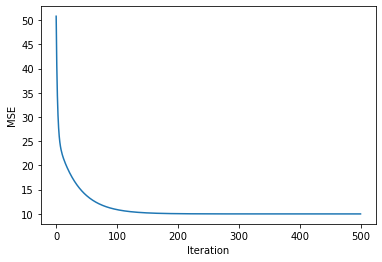

In [8]:
initial_theta_0 = random.random()
initial_theta_1 = random.random()
alpha = 0.5
num_iterations = 500

theta_0s, theta_1s = alegrete.fit(
    alegrete_data, theta_0=initial_theta_0, theta_1=initial_theta_1, 
    alpha=alpha, num_iterations=num_iterations
)

final_th0, final_th1 = theta_0s[-1], theta_1s[-1]

mse_list = [alegrete.compute_mse(th0, th1, alegrete_data) for th0, th1 in zip(theta_0s, theta_1s)]
print(f"Final MSE: {mse_list[-1]}")

plt.plot(mse_list)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

### Final curve

Found curve: 27.895724401159278*x + -18.630277296733233


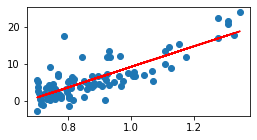

In [9]:
theta_0s, theta_1s = alegrete.fit(
    alegrete_data, theta_0=initial_theta_0, theta_1=initial_theta_1, 
    alpha=alpha, num_iterations=num_iterations
)


final_th0, final_th1 = theta_0s[-1], theta_1s[-1]

print (f'Found curve: {final_th1}*x + {final_th0}')

plt.figure(figsize=(4, 2))
plt.scatter(alegrete_data[:, 0], alegrete_data[:, 1])

pred = final_th1*alegrete_data[:, 0] + final_th0
plt.plot(alegrete_data[:,0], pred, c='r')
plt.show()

### Fitting progress

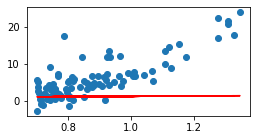

In [10]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(111)

ax.scatter(alegrete_data[:, 0], alegrete_data[:, 1])

pred = theta_1s[0]*alegrete_data[:,0] + theta_0s[0]
line, = ax.plot(alegrete_data[:,0], pred, '-',c='r')

def animate(i):
    pred = theta_1s[i] * alegrete_data[:,0] + theta_0s[i]
    line.set_ydata(pred)
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(theta_0s), interval=20, save_count=50)
HTML(ani.to_jshtml())